In [1]:
%config IPCompleter.greedy=True


### Loading packages and libraries 

In [1]:
import itertools
import numpy as np
from Bio import Align
from Bio import SeqIO
from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
import csv
import pandas as pd
from Bio.SeqRecord import SeqRecord

import random
from random import randint
from sklearn.model_selection  import train_test_split, StratifiedKFold
from sklearn.svm import SVC

# import the metrics class
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, classification_report

from sklearn import metrics
# import required modules for plotig
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
seed =45

# Reading Interacting lncRNAs

In [2]:
df_nc_seq= pd.read_csv('../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean2.csv')
df_nc_seq.shape

(1925, 11)

In [3]:
df_nc_seq.head(5)

,nncid,accn,class,organism,name,ref,transcriptID,url,cpcScore,cnci,sequence
0,n344453,NULL,lincRNA,Homo sapiens,Human lincRNA,Scripture Reconstruction LincRNAs By Luo,linc_luo_1,NULL,-1.48162,-0.211334,TCTCGCTCTGTCACCCAGGCTGGAGTGCAGTGGCGTGATCTCGGCT...
1,n344454,NULL,lincRNA,Homo sapiens,Human lincRNA,Scripture Reconstruction LincRNAs By Luo,linc_luo_2,NULL,-1.29125,-0.390813,ATTGTTAACGGCTGCGGTTCGAAGTGGCTGTGGGTATTGCTGCGGC...
2,n344455,NULL,lincRNA,Homo sapiens,Human lincRNA,Scripture Reconstruction LincRNAs By Luo,linc_luo_3,NULL,-1.27104,-0.166314,AAATGAGGATGAAGCCAAGTGTTTGGAGTTCTTGCGAAGAAAGATA...
3,n344457,NULL,lincRNA,Homo sapiens,Human lincRNA,Scripture Reconstruction LincRNAs By Luo,linc_luo_5,NULL,-1.36124,-0.309593,GGCCGGAGAGGCAGCAGCACCCCGAGCTGTCAGGCGTTCCGCCGCG...
4,n344460,NULL,lincRNA,Homo sapiens,Human lincRNA,Scripture Reconstruction LincRNAs By Luo,linc_luo_8,NULL,-1.30821,-0.336347,AAGGTGGACTAGACAAAGTTGTATCTAGACCCTTATCATATATGTG...


# Reading interacting proteins

In [4]:
df_p_seq = pd.read_csv('..\Data\\NpInter2 Interacting Protiens\\Np_pSeq_26_1923.csv')
df_p_seq.shape

(25, 4)

In [5]:
df_p_seq.head(5)

,Entry,Sequence,Cross-reference (PDB),Entry name
0,Q07955,MSGGGVIRGPAGNNDCRIYVGNLPPDIRTKDIEDVFYKYGAIRDID...,1X4A;2M7S;2M8D;2O3D;3BEG;4C0O;,SRSF1_HUMAN
1,Q01844,MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...,2CPE;,EWS_HUMAN
2,Q9UL18,MEAGPSGAAAGAYLPPLQQVFQAPRRPGIGTVGKPIKLLANYFEVD...,1SI2;1SI3;4KRE;4KRF;4KXT;5W6V;,AGO1_HUMAN
3,Q9UKV8,MYSGAGPALAPPAPPPPIQGYAFKPPPRPDFGTSGRTIKLQANFFE...,3LUC;3LUD;3LUG;3LUH;3LUJ;3LUK;3QX8;3QX9;4F3T;4...,AGO2_HUMAN
4,Q9H9G7,MEIGSAGPAGAQPLLMVPRRPGYGTMGKPIKLLANCFQVEIPKIDV...,5VM9;,AGO3_HUMAN


# Reading np inter v 2 interactions

In [6]:
df_NPInter2 = pd.read_csv('../data/NPInter_v2.0 homo_sapiens_type_lncrna.csv')
df_NPInter2.shape

(5353, 16)

In [7]:
df_NPInter2.head(5)

,interID,ncID,ncType,ncIdentifier,ncName,PartnerID,prType,prIdentifier,InteractionPartner,interDescription,experiment,pubmed,organism,tag,interClass,interLevel
0,ncRI-199556,16426,NONCODE,n386623,RPI001_920445,18387,UniProt,Q07955,SRSF1,Cross-linking immunoprecipitation and high-thr...,CLIP-seq,19116412,Homo sapiens,ncRNA-protein binding,binding,RNA-Protein
1,ncRI-192633,12013,NONCODE,n407114,RPI001_182337,3988,UniProt,Q01844,EWSR1,PAR-CLIP defined global RNA targets for all hu...,PAR-CLIP,22081015,Homo sapiens,ncRNA-protein binding,binding,RNA-Protein
2,ncRI-191389,11713,NONCODE,n408119,RPI001_114723,515,UniProt,Q9UL18,AGO1-4,PAR-CLIP of combined AGO1-4 indicates the nonc...,PAR-CLIP,20371350,Homo sapiens,ncRNA-protein binding,binding,RNA-Protein
3,ncRI-191389,11713,NONCODE,n408119,RPI001_114723,515,UniProt,Q9UKV8,AGO1-4,PAR-CLIP of combined AGO1-4 indicates the nonc...,PAR-CLIP,20371350,Homo sapiens,ncRNA-protein binding,binding,RNA-Protein
4,ncRI-191389,11713,NONCODE,n408119,RPI001_114723,515,UniProt,Q9H9G7,AGO1-4,PAR-CLIP of combined AGO1-4 indicates the nonc...,PAR-CLIP,20371350,Homo sapiens,ncRNA-protein binding,binding,RNA-Protein


### Reading Protein similarity scores 

In [8]:
# read protein similarites
df_pr_sim = pd.read_csv('../Data/NpInter2 Interacting Protiens/Protein-Protein Sequence Similarity/Protien-Protien_Similarity_26_1923.csv')
df_pr_sim.nunique()

Query_Seq_ID        25
Target_Seq_ID       25
Align_Score        190
Normalize_Score     30
Identity           283
Similarity         289
dtype: int64

### Reading LncRNA similarity scores

In [9]:
df_lnc_sim = pd.read_csv("../Data/NpInter2 Interacting LncRNAs/LncRNA-LncRNA Sequence Similarity/LncRNA-LncRNA_Similarity.csv")
df_lnc_sim.shape

(449338, 6)

In [10]:
df_lnc_sim.nunique()

Query_Seq_ID         344
Target_Seq_ID       1309
Align_Score        13095
Normalize_Score       73
Identity            2907
Similarity          2907
dtype: int64

### adding the nncid with respect to NONCODEID

In [11]:
df_nc22= pd.read_csv("../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean.csv")
df_nc22.shape

(1309, 12)

In [12]:
noncode_dict=dict(zip(df_nc22.NONCODEID,df_nc22.nncid))


In [13]:
def label_nonecodeid_to_nncid (row, noncode_dict):
    if row['Query_Seq_ID'] in  noncode_dict:
        #print( noncode_dict[row['Query_Seq_ID']])
        return noncode_dict[row['Query_Seq_ID']]
    

In [14]:

df_lnc_sim['nncid'] = df_lnc_sim.apply (lambda row: label_nonecodeid_to_nncid(row,noncode_dict), axis=1)
df_lnc_sim.nunique()

Query_Seq_ID         344
Target_Seq_ID       1309
Align_Score        13095
Normalize_Score       73
Identity            2907
Similarity          2907
nncid                344
dtype: int64

In [15]:
def label_nonecodeid_to_nncid2 (row, noncode_dict):
    if row['Target_Seq_ID'] in  noncode_dict:
        #print( noncode_dict[row['Query_Seq_ID']])
        return noncode_dict[row['Target_Seq_ID']]

In [16]:
df_lnc_sim['nncid_target'] = df_lnc_sim.apply (lambda row: label_nonecodeid_to_nncid2(row,noncode_dict), axis=1)
df_lnc_sim.nunique()

Query_Seq_ID         344
Target_Seq_ID       1309
Align_Score        13095
Normalize_Score       73
Identity            2907
Similarity          2907
nncid                344
nncid_target        1309
dtype: int64

In [17]:
df_lnc_sim = df_lnc_sim[df_lnc_sim.nncid != 'n363337']

In [18]:
#print(df_lnc_sim.nunique())
df_lnc_sim.head()

,Query_Seq_ID,Target_Seq_ID,Align_Score,Normalize_Score,Identity,Similarity,nncid,nncid_target
0,NONHSAT044059.2,NONHSAT140501.2,597.0,0.09,41.41,41.41,n344453,n344454
1,NONHSAT044059.2,NONHSAT030943.2,2269.5,0.15,40.74,40.74,n344453,n344455
2,NONHSAT044059.2,NONHSAT049673.2,1165.0,0.11,33.98,33.98,n344453,n344457
3,NONHSAT044059.2,NONHSAT119864.2,2999.5,0.13,36.53,36.53,n344453,n344460
4,NONHSAT044059.2,NONHSAT070239.2,1843.0,0.14,37.13,37.13,n344453,n344461


### filtering the NPInterV2 interactions with respect to lncRNAs similarity items

In [19]:
df_np2_344 = df_NPInter2[df_NPInter2['ncIdentifier'].isin(df_lnc_sim.nncid)]
df_np2_344.nunique()

interID               958
ncID                  343
ncType                  1
ncIdentifier          343
ncName                343
PartnerID              20
prType                  1
prIdentifier           24
InteractionPartner     20
interDescription       22
experiment              5
pubmed                 12
organism                1
tag                     1
interClass              1
interLevel              1
dtype: int64

In [20]:
# filtering the similarities according to target ids
df_lnc_sim343 = df_lnc_sim[df_lnc_sim['nncid_target'].isin(df_np2_344.ncIdentifier)]
df_lnc_sim343.nunique()

Query_Seq_ID        343
Target_Seq_ID       343
Align_Score        9932
Normalize_Score      33
Identity           2136
Similarity         2136
nncid               343
nncid_target        343
dtype: int64

In [21]:
df_lnc_sim343.shape

(117306, 8)

In [22]:
df_lnc_sim343.columns

Index(['Query_Seq_ID', 'Target_Seq_ID', 'Align_Score', 'Normalize_Score',
       'Identity', 'Similarity', 'nncid', 'nncid_target'],
      dtype='object')

In [23]:
# adding self similarity score for each nncid
lst_lnc_343 = df_lnc_sim343.nncid.unique()
for nc in lst_lnc_343:
    df_lnc_sim343=df_lnc_sim343.append({'Query_Seq_ID':nc, 'Target_Seq_ID':nc ,'Align_Score': 100,'Normalize_Score':1.0,
                         'Identity':100, 'Similarity':100,'nncid':nc,'nncid_target':nc}, ignore_index=True)
df_lnc_sim343.shape    

(117649, 8)

In [24]:
df_np2_344.shape

(1031, 16)

In [25]:
#balanceing protein seq data
df_p_seq=df_p_seq[df_p_seq.Entry.isin(df_np2_344.prIdentifier)]
df_p_seq.nunique()

Entry                    19
Sequence                 19
Cross-reference (PDB)    16
Entry name               19
dtype: int64

In [26]:
df_np2_344=df_np2_344[df_np2_344.prIdentifier.isin(df_p_seq.Entry)]
df_np2_344.nunique()

interID               958
ncID                  343
ncType                  1
ncIdentifier          343
ncName                343
PartnerID              20
prType                  1
prIdentifier           19
InteractionPartner     20
interDescription       22
experiment              5
pubmed                 12
organism                1
tag                     1
interClass              1
interLevel              1
dtype: int64

In [27]:
df_pr_sim19=df_pr_sim[df_pr_sim['Query_Seq_ID'].isin(df_p_seq.Entry)]
df_pr_sim19=df_pr_sim19[df_pr_sim19['Target_Seq_ID'].isin(df_p_seq.Entry)]
df_pr_sim19.nunique()

Query_Seq_ID        19
Target_Seq_ID       19
Align_Score        141
Normalize_Score     22
Identity           161
Similarity         170
dtype: int64

### preparing the features set for NPInterV2 dataset

In [28]:
# creating features from npinter v2

def prepare_NPinter_feature(df_p_seq, df_nc_seq, df_NPInter2, df_pr_sim,df_lnc_sim):
    # create dict of proteins
    pro_dict=dict(zip(df_p_seq.Entry,df_p_seq.Sequence))
    # create dict of lncRnas
    lnc_dict = dict(zip(df_nc_seq.nncid,df_nc_seq.sequence))
    # positive set
    posi_set = set()
    pro_set = set()
    X_features =[]
    Y_labels =[]
    df_interact = pd.DataFrame(columns=['ncIdentifier', 'prIdentifier', 'interaction'])
    # geting positive class
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        posi_set.add((ncIdentifier, prIdentifier))
        pro_set.add(prIdentifier)
        if (ncIdentifier in lnc_dict) and (prIdentifier in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': prIdentifier, 'interaction': 1}, ignore_index=True)
            sim_lst_pro = df_pr_sim[df_pr_sim['Query_Seq_ID']==prIdentifier]['Normalize_Score'].tolist()
            sim_lst_lnc = df_lnc_sim[df_lnc_sim['nncid']==ncIdentifier]['Normalize_Score'].tolist()
            if len(sim_lst_lnc)< 343:
                print("pos: " + ncIdentifier)
            #X_features.append((sim_lst_pro,sim_lst_lnc))
            X_features.append(sim_lst_pro + sim_lst_lnc)
            Y_labels.append(1)

        else:
            print(prIdentifier)
    #getting negative data or class
    pro_list = list(pro_set)   
    total_pro_len = len(pro_list)  
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        #posi_set.add((ncIdentifier, prIdentifier))
        for val in range(50):
                    random_choice = randint(0,total_pro_len-1)
                    select_pro = pro_list[random_choice]
                    selec_nega= (ncIdentifier, select_pro)
                    if selec_nega not in posi_set:
                        posi_set.add(selec_nega)
                        #print selec_nega
                        break
        if (ncIdentifier in lnc_dict) and (select_pro in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': select_pro, 'interaction': 0}, ignore_index=True)
            sim_lst_pro = df_pr_sim[df_pr_sim['Query_Seq_ID']==select_pro]['Normalize_Score'].tolist()
            sim_lst_lnc = df_lnc_sim[df_lnc_sim['nncid']==ncIdentifier]['Normalize_Score'].tolist()
            if len(sim_lst_lnc)< 343:
                print("neg: " + ncIdentifier)
            #X_features.append((sim_lst_pro,sim_lst_lnc))
            X_features.append(sim_lst_pro + sim_lst_lnc)
            Y_labels.append(0)
    return df_interact,np.array(X_features) , Y_labels

        
    


In [29]:
df_interact, X_Features, Y_Labels=prepare_NPinter_feature(df_p_seq, df_nc_seq, df_np2_344, df_pr_sim19,df_lnc_sim343)
df_interact.shape

(1916, 3)

In [30]:
len(X_Features)

1916

In [31]:
df_lnc_sim.count()

Query_Seq_ID       448644
Target_Seq_ID      448644
Align_Score        448644
Normalize_Score    448644
Identity           448644
Similarity         448644
nncid              448644
nncid_target       448644
dtype: int64

In [187]:
# save pairs to disk
df_interact.to_csv('../data/NpInterV2_Pairs_19_343.csv')

### SVM model with linear kernel


#### 5 Fold straitafied 

In [32]:
#spliting train test
X_train,X_test,y_train,y_test=train_test_split(X_Features,Y_Labels,test_size=0.25,random_state=0)
len(X_train)

1437

In [33]:
# fiting kfold model with svm and kernel = linear
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
y_train1=np.array(y_train)
#y_train1=y_train1.reshape(-1,1)
#print(y_train.shape)
#print(X_train.shape)

for train_index,test_index in kf.split(X_train,y_train1):
    print('{} of KFold {}'.format(i,kf.n_splits))
    #print(train_index)
    #print(test_index)
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train1[train_index],y_train1[test_index]
    
    #model
    svclassifier = SVC(kernel='linear',probability=True)
    svclassifier.fit(xtr,ytr)
    score = roc_auc_score(yvl,svclassifier.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = svclassifier.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.7540631782011092
2 of KFold 5
ROC AUC score: 0.7090909090909092
3 of KFold 5
ROC AUC score: 0.6866501554001554
4 of KFold 5
ROC AUC score: 0.7041812354312356
5 of KFold 5
ROC AUC score: 0.7212752525252526


In [38]:
len(xvl)

287

In [34]:
#print confusion matrix
print('Confusion matrix\n',confusion_matrix(yvl,svclassifier.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print(classification_report(yvl,svclassifier.predict(xvl)))


Confusion matrix
 [[103  41]
 [ 39 104]]
Cv [0.7540631782011092, 0.7090909090909092, 0.6866501554001554, 0.7041812354312356, 0.7212752525252526] 
Mean cv Score 0.7150521461297323
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       144
           1       0.72      0.73      0.72       143

   micro avg       0.72      0.72      0.72       287
   macro avg       0.72      0.72      0.72       287
weighted avg       0.72      0.72      0.72       287



In [73]:
count0=0
count1=0
for x in yvl:
    if x==1:
        count1+=1
    else:
        count0+=1

print("pos: " + str(count1))
print("neg: "+ str(count0))
    
        

pos: 143
neg: 144


In [35]:
print('results on val set')
print("Accuracy:",metrics.accuracy_score(yvl, svclassifier.predict(xvl)))
print("Precision:",metrics.precision_score(yvl, svclassifier.predict(xvl)))
print("Recall:",metrics.recall_score(yvl, svclassifier.predict(xvl)))
print("F1 Score:",metrics.f1_score(yvl, svclassifier.predict(xvl)))

results on val set
Accuracy: 0.7212543554006968
Precision: 0.7172413793103448
Recall: 0.7272727272727273
F1 Score: 0.7222222222222223


In [36]:
print('results on test set')
print("Accuracy:",metrics.accuracy_score(y_test, svclassifier.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, svclassifier.predict(X_test)))
print("Recall:",metrics.recall_score(y_test, svclassifier.predict(X_test)))
print("F1 Score:",metrics.f1_score(y_test, svclassifier.predict(X_test)))

results on test set
Accuracy: 0.7348643006263048
Precision: 0.7248062015503876
Recall: 0.7695473251028807
F1 Score: 0.7465069860279441


In [223]:
#lr.coef_


In [39]:
svclassifier.score(xvl,yvl)


0.6794425087108014

### Reciever Operating Characteristics


Text(0.5, 0, 'False positive rate')

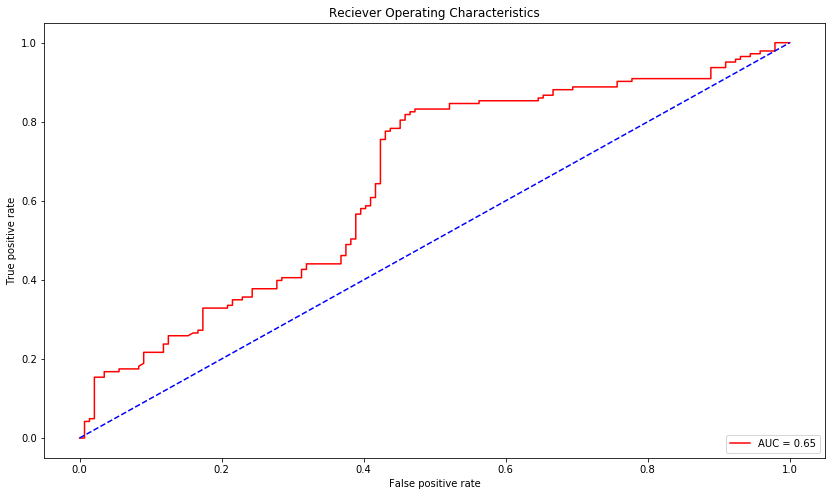

In [40]:
proba = svclassifier.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### SVM model with rbf kernel


#### 5 Fold straitafied 

In [41]:
#spliting train test
# X_train,X_test,y_train,y_test=train_test_split(X_Features,Y_Labels,test_size=0.25,random_state=0)
# len(X_train)

In [75]:
# fiting kfold model with svm and kernel = linear
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
y_train1=np.array(y_train)
#y_train1=y_train1.reshape(-1,1)
#print(y_train.shape)
#print(X_train.shape)

for train_index,test_index in kf.split(X_train,y_train1):
    print('{} of KFold {}'.format(i,kf.n_splits))
    #print(train_index)
    #print(test_index)
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train1[train_index],y_train1[test_index]
    
    #model
    svclassifier2 = SVC(kernel='sigmoid', probability=True, gamma=0.1, C=2)#SVC(kernel='rbf',probability=True,gamma=0.1, C=2)
    svclassifier2.fit(xtr,ytr)
    score = roc_auc_score(yvl,svclassifier.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = svclassifier.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.7195804195804195
2 of KFold 5
ROC AUC score: 0.7435736677115988
3 of KFold 5
ROC AUC score: 0.6831779331779332
4 of KFold 5
ROC AUC score: 0.7041812354312356
5 of KFold 5
ROC AUC score: 0.6799242424242425


In [76]:
#print confusion matrix
print('Confusion matrix\n',confusion_matrix(yvl,svclassifier2.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print(classification_report(yvl,svclassifier2.predict(xvl)))


Confusion matrix
 [[ 78  66]
 [ 26 117]]
Cv [0.7195804195804195, 0.7435736677115988, 0.6831779331779332, 0.7041812354312356, 0.6799242424242425] 
Mean cv Score 0.706087499665086
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       144
           1       0.64      0.82      0.72       143

   micro avg       0.68      0.68      0.68       287
   macro avg       0.69      0.68      0.67       287
weighted avg       0.69      0.68      0.67       287



In [77]:
#results on test set
print("Accuracy:",metrics.accuracy_score(y_test, svclassifier2.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, svclassifier2.predict(X_test)))
print("Recall:",metrics.recall_score(y_test, svclassifier2.predict(X_test)))
print("F1 Score:",metrics.f1_score(y_test, svclassifier2.predict(X_test)))

Accuracy: 0.732776617954071
Precision: 0.7075812274368231
Recall: 0.8065843621399177
F1 Score: 0.7538461538461538


In [223]:
#lr.coef_


In [78]:
#svclassifier.score(xvl,yvl)
print("validation set score:")
print(svclassifier2.score(xvl,yvl))

print("test set score:")
print(svclassifier2.score(X_test,y_test))


validation set score:
0.6794425087108014
test set score:
0.732776617954071


### Reciever Operating Characteristics


Text(0.5, 0, 'False positive rate')

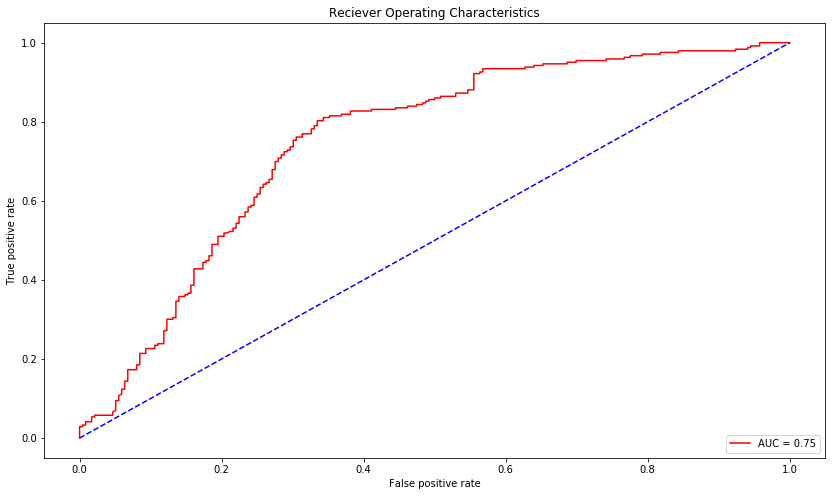

In [79]:
proba = svclassifier2.predict_proba(X_test)[:,1]
frp,trp, threshold = roc_curve(y_test,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')